 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1269]:
# Initial imports
!pip install pandas
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline



# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [1270]:
wr_path = ("Resources/whale_returns.csv")


In [1271]:
wr = pd.read_csv("whale_returns.csv", parse_dates=True,index_col="Date", infer_datetime_format=True)

In [1272]:
# Reading whale returns
wr.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [1273]:
# Count nulls
wr.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [1274]:
# Drop nulls
wr = wr.dropna().copy()
wr.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [1275]:
wr.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [1276]:
# Reading algorithmic returns
algo_returns_path = ("Resources/algo_returns.csv")
ar = pd.read_csv("algo_returns.csv", parse_dates=True, index_col="Date", infer_datetime_format=True)


In [1277]:
ar.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [1278]:
# Count nulls
ar.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [1279]:
# Drop nulls
ar = ar.dropna().copy()
ar.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [1280]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = ("../Resources/sp_tsx_history.csv")
sph = pd.read_csv("sp_tsx_history.csv", parse_dates=True, index_col="Date",infer_datetime_format=True)




In [1281]:
sph.head()


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [1282]:
# Check Data Type
sph.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1818 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB


In [1283]:
sph["Close"].dtype

dtype('O')

In [1284]:
# Fix Data Types
sph["Close"] = sph["Close"].str.replace("$", "", regex=True)
sph["Close"] = sph["Close"].str.replace(",", "", regex=True)
sph["Close"].head(10)

Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
2012-10-09    12273.57
2012-10-10    12212.42
2012-10-11    12233.95
2012-10-12    12202.04
2012-10-15    12229.96
Name: Close, dtype: object

In [1285]:
sph["Close"] = sph["Close"].astype("float")
sph["Close"].dtype

dtype('float64')

In [1286]:
# Calculate Daily Returns 
sph_returns = sph.pct_change()
                

In [1287]:

sph_returns.head(10)    

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
2012-10-10,-0.004982
2012-10-11,0.001763
2012-10-12,-0.002608


In [1288]:
# Drop nulls

sph_returns = sph_returns.dropna().copy()


In [1289]:
# Rename `Close` Column to be specific to this portfolio.

sph_returns = sph_returns.rename(columns={'Close':'s&p_tsx'})


In [1290]:

sph_returns.head()

,s&p_tsx
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [1291]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
was_returns_concat = pd.concat([wr, ar, sph_returns], axis = "columns", join = "inner")

was_returns_concat.head()




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,s&p_tsx
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555




---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Portfolio Daily Returns'}, xlabel='Date'>

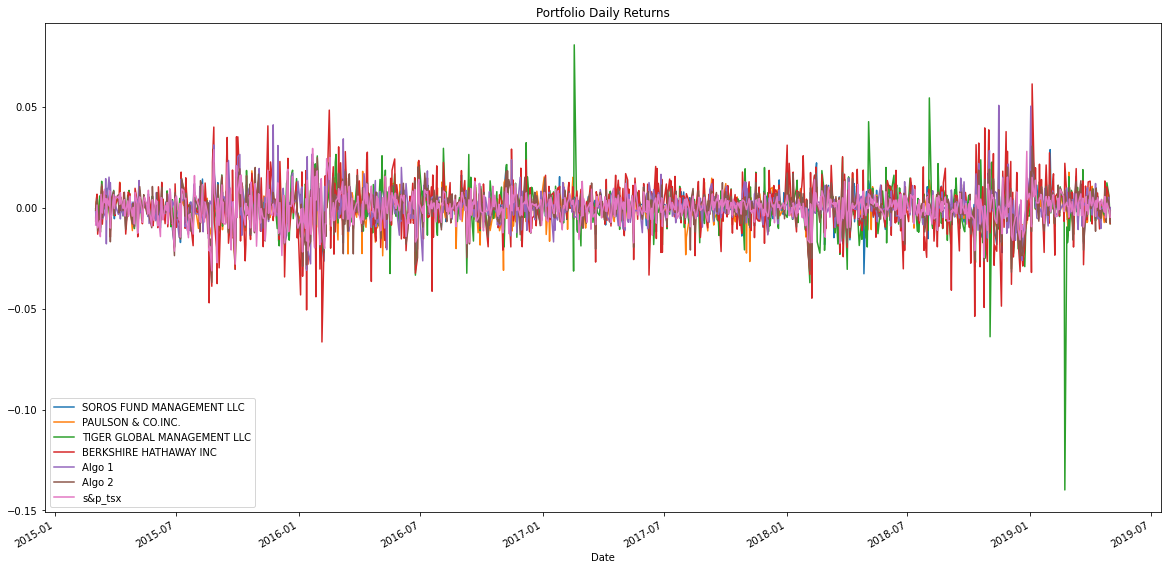

In [1292]:
# Plot daily returns of all portfolios
was_returns_concat.plot(kind="line", title="Portfolio Daily Returns", figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'cumulative Daily Returns'}, xlabel='Date'>

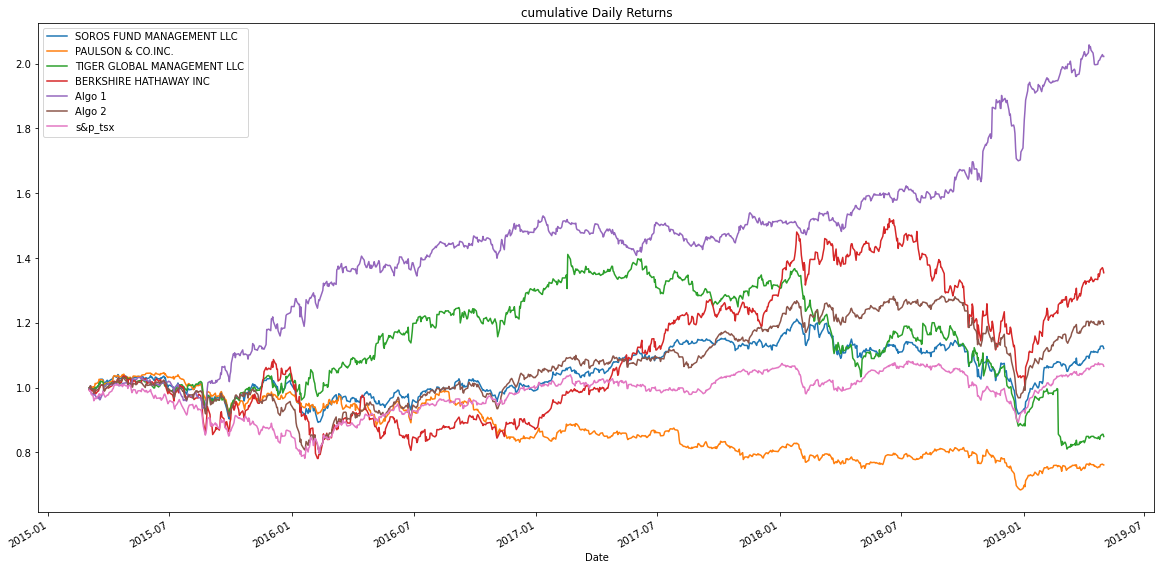

In [1293]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + was_returns_concat).cumprod()
# Plot cumulative returns
cumulative_returns.plot(kind="line", title="cumulative Daily Returns", figsize=(20,10)) 

---


## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'portfolio risk'}>

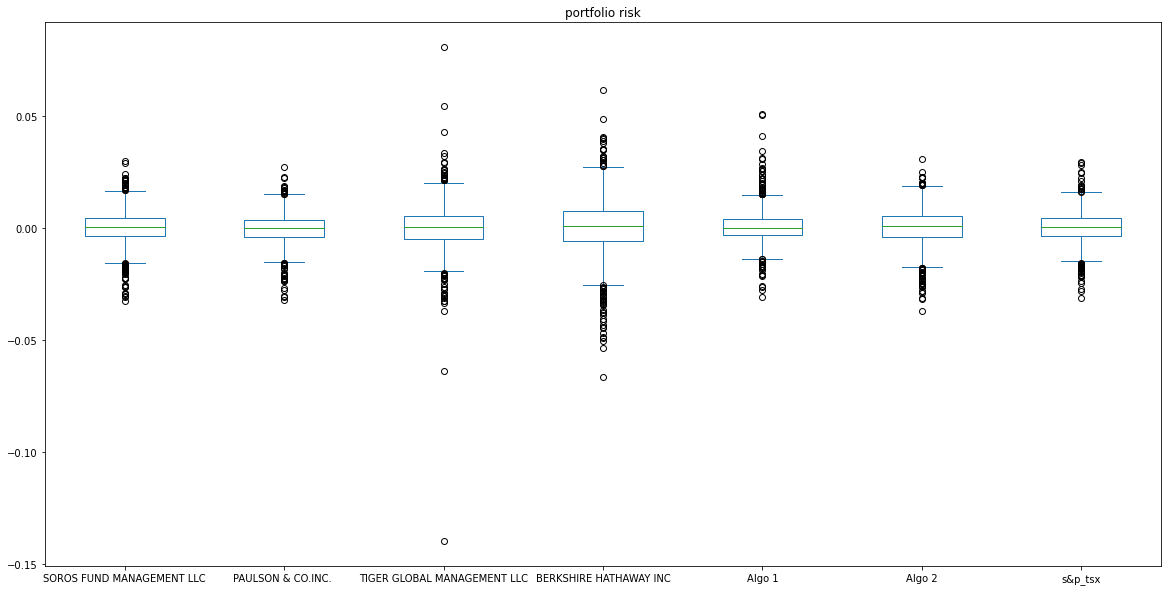

In [1294]:
# Box plot to visually show risk
was_returns_concat.plot(kind="box", title="portfolio risk", figsize=(20,10))

### Calculate Standard Deviations

In [1295]:
# Calculate the daily standard deviations of all portfolios
was_returns_std = pd.DataFrame(was_returns_concat.std()).rename(columns = {0:"STD"})
was_returns_std

,STD
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
s&p_tsx,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [1296]:
# Calculate  the daily standard deviation of S&P TSX 60
tsx_std = was_returns_std.loc["s&p_tsx", "STD"].round(decimals=6)
# Determine which portfolios are riskier than the S&P TSX 60
tsx_std

0.007034

In [1297]:
#portfolios riskier than the s&P tsx 60
riskier_than_sp = was_returns_std[was_returns_std["STD"] > was_returns_std.loc["s&p_tsx", "STD"]]
riskier_than_sp

,STD
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


### Calculate the Annualized Standard Deviation

In [1298]:
# Calculate the annualized standard deviation (252 trading days)
an_std = was_returns_std * np.sqrt(252)
an_std

,STD
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
s&p_tsx,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [1299]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std21_rolling = was_returns_std * np.sqrt(21)

std21_rolling


,STD
SOROS FUND MANAGEMENT LLC,0.035870
PAULSON & CO.INC.,0.031997
TIGER GLOBAL MANAGEMENT LLC,0.049871
BERKSHIRE HATHAWAY INC,0.058774
Algo 1,0.034777
Algo 2,0.038156
s&p_tsx,0.032235


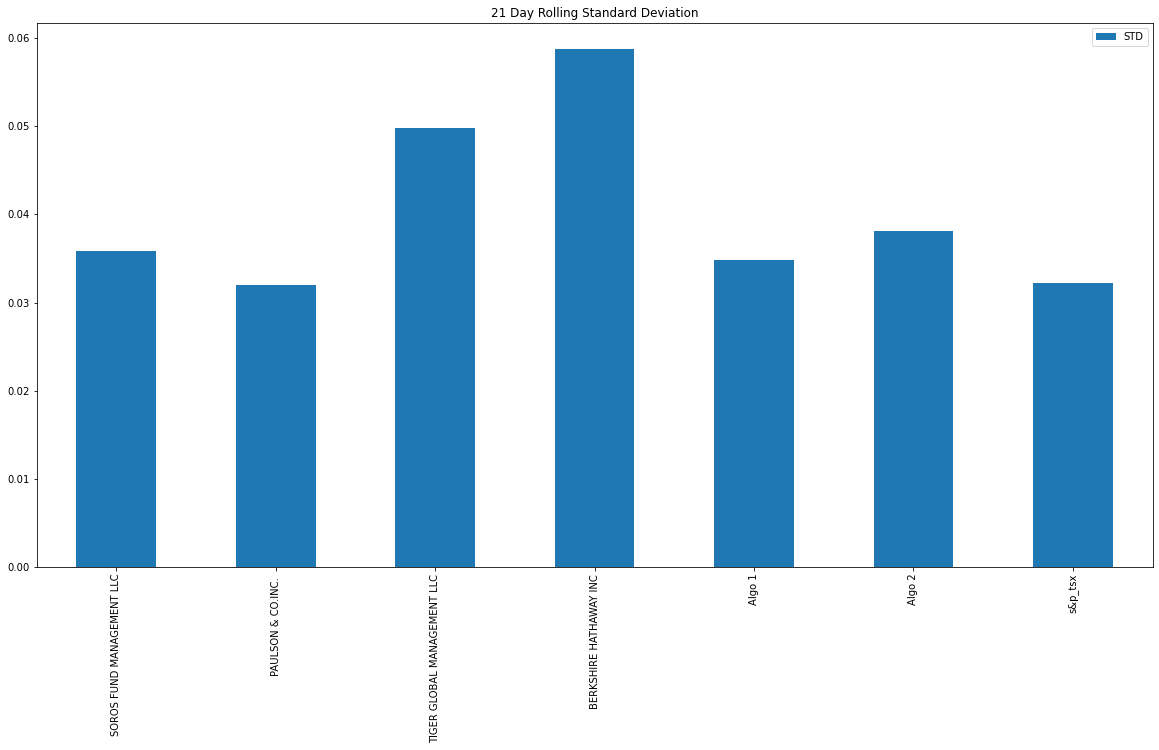

In [1300]:
#Plot the rolling standard deviation
std21_rolling = std21_rolling.plot(kind ="bar", title = "21 Day Rolling Standard Deviation", figsize=(20, 10))

### Calculate and plot the correlation

In [1301]:
# Calculate the correlation
sp_tsx_correlation = pd.DataFrame(was_returns_concat.corr()).loc["s&p_tsx"]
sp_tsx_correlation[sp_tsx_correlation==sp_tsx_correlation[sp_tsx_correlation<1].max()]

sp_tsx_correlation


SOROS FUND MANAGEMENT LLC      0.673930
PAULSON & CO.INC.              0.486511
TIGER GLOBAL MANAGEMENT LLC    0.440583
BERKSHIRE HATHAWAY INC         0.557250
Algo 1                         0.310276
Algo 2                         0.737370
s&p_tsx                        1.000000
Name: s&p_tsx, dtype: float64

[Text(0.5, 1.0, 'Correlation Matrix')]

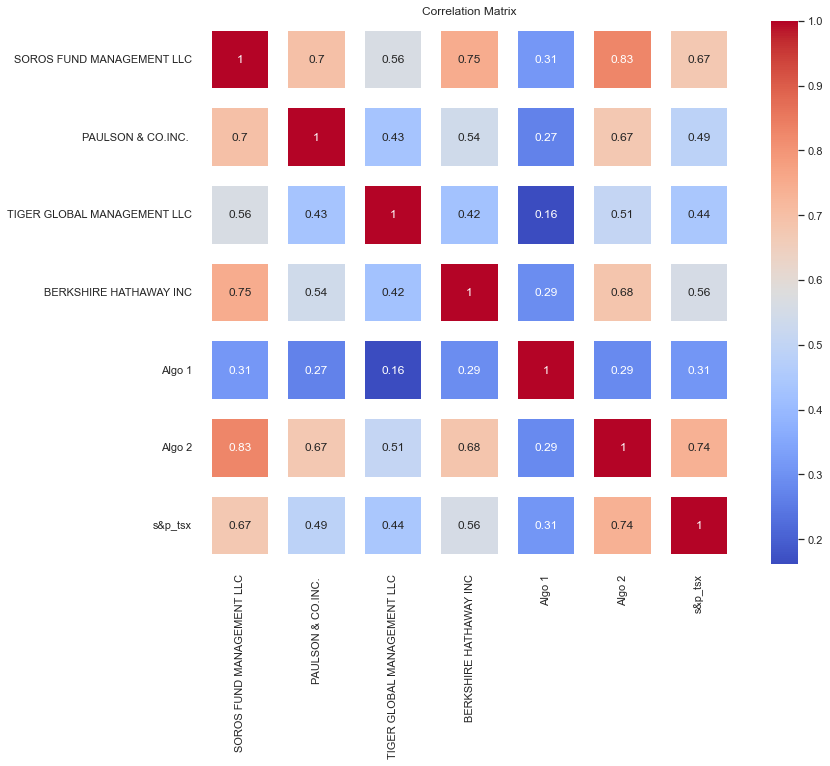

In [1302]:
#Display de correlation matrix
sp_tsx_correlation = was_returns_concat.corr()

sns.set(rc={"figure.figsize": (12, 10)})
sns.heatmap(sp_tsx_correlation, cmap="coolwarm", linewidths=20, annot=True).set(title= "Correlation Matrix")

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Beta plot - SOROS FUND MANAGEMENT LLC : s&p_tsx'}, xlabel='Date'>

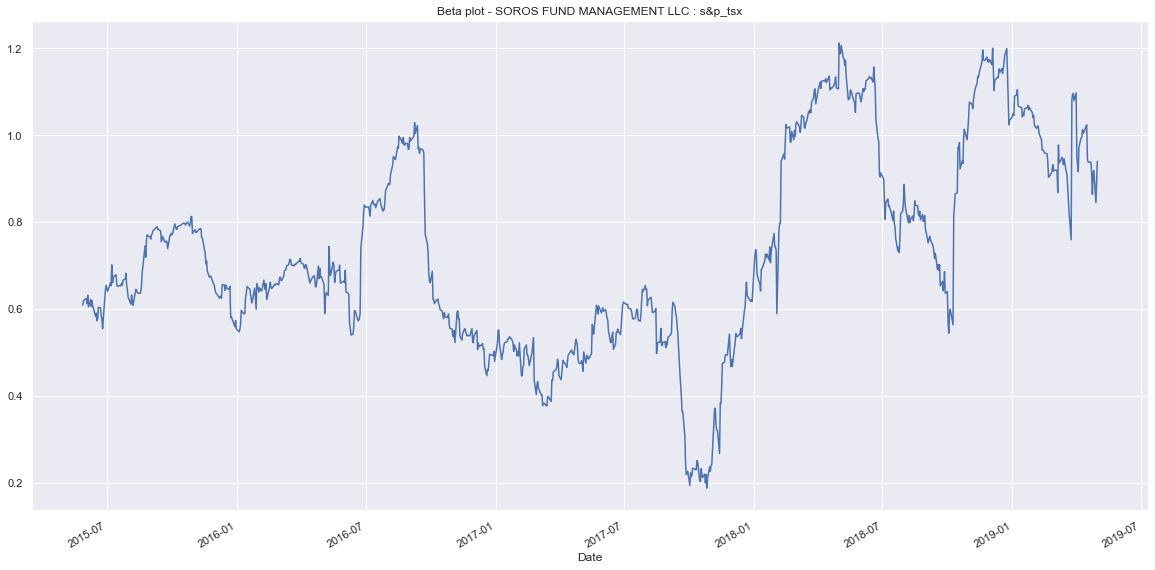

In [1317]:
# Calculate covariance of a single portfolio
SOROS_cov = was_returns_concat["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(was_returns_concat["s&p_tsx"])
# Calculate variance of S&P TSX
sp_tsx_var = was_returns_concat["s&p_tsx"].rolling(window=60).var()
# Computing beta
SOROS_beta = Paulson_cov / sp_tsx_var
# Plot beta trend
SOROS_beta.plot(kind="line", title="Beta plot - SOROS FUND MANAGEMENT LLC : s&p_tsx", figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [1321]:
# Annualized Sharpe Ratios
sharpe_returns= (was_returns_concat.mean() * 252) / (was_returns_concat.std() * np.sqrt(252))
sharpe_returns

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
s&p_tsx                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio Bar Plot'}>

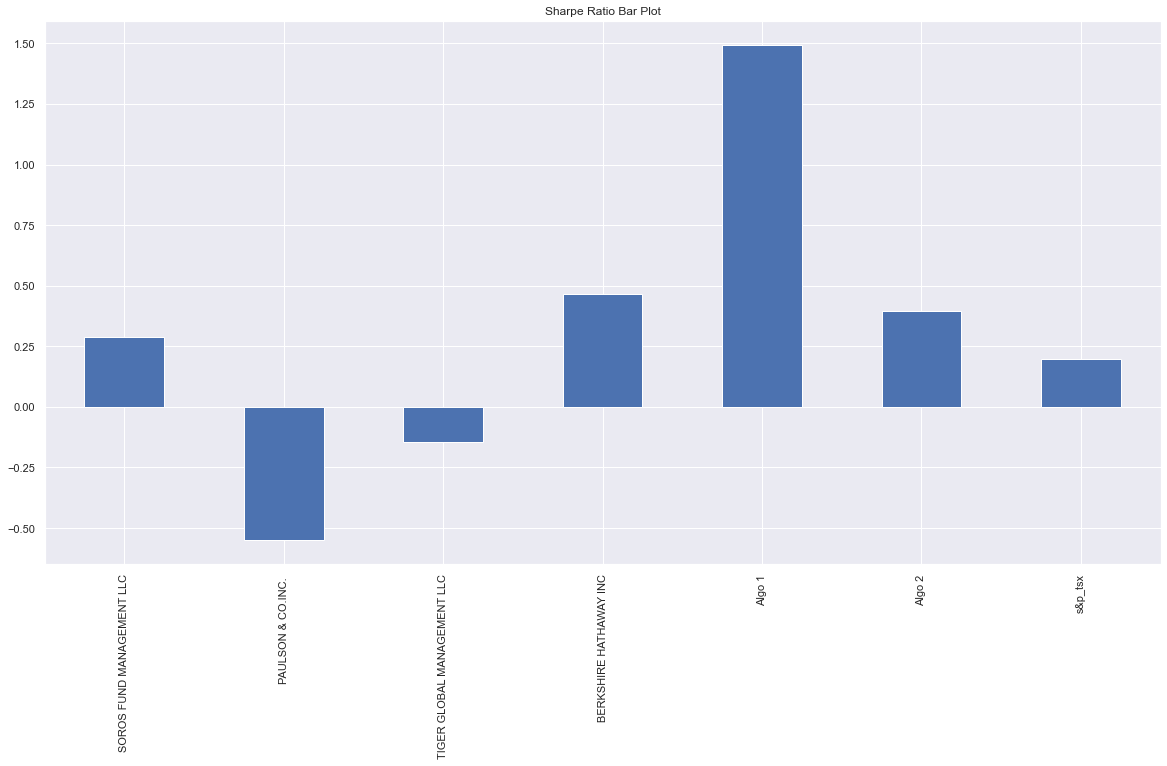

In [1322]:
# Visualize the sharpe ratios as a bar plot
sharpe_returns.plot(kind= "bar", title= "Sharpe Ratio Bar Plot", figsize = (20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [1323]:
# Reading data from 1st stock
shop_historical_path = Path("../Resources/shop_historical.csv")
sh = pd.read_csv("shop_historical.csv", parse_dates=True, index_col="Date", infer_datetime_format=True)
sh.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [1325]:
# Reading data from 2nd stock
otex_historical_path = Path("../Resources/otex_historical.csv")
ot = pd.read_csv("otex_historical.csv", parse_dates=True, index_col="Date", infer_datetime_format=True)
ot.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [1327]:
# Reading data from 3rd stock
l_historical_path = Path("../Resources/l_historical.csv")
l = pd.read_csv("l_historical.csv", parse_dates=True, index_col="Date", infer_datetime_format=True)
l.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [1328]:
# Combine all stocks in a single DataFrame
com_df_concat= pd.concat([ sh, ot, l], axis="columns", join="inner")
com_df_concat.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [1333]:
# Reset Date index
com_df_concat.drop(columns=['Symbol', 'Symbol', 'Symbol'], inplace=True)
com_df_concat

,Close,Close,Close
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [1334]:
# Reorganize portfolio data by having a column per symbol
com_df_concat.columns=["SHOP", "OTEX", "L"]
com_df_concat.head()

,SHOP,OTEX,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [1335]:
# Calculate daily returns
daily_returns= com_df_concat.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
daily_returns.isnull().sum()
# Display sample data
daily_returns.head()

,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [1336]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
wp = daily_returns.dot(weights)
wpr = wp.pct_change()
# Display sample data
wpr.head()

Date
2018-01-03         NaN
2018-01-04    6.999117
2018-01-05   -1.692070
2018-01-08   -0.681011
2018-01-09    0.001405
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [1337]:
# Join your returns DataFrame to the original returns DataFrame
altogether= pd.concat([was_returns_concat, daily_returns], axis= "columns", join="inner")
altogether

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,s&p_tsx,SHOP,OTEX,L
Date,,,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.023398,-0.011703,-0.010002
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.017092,-0.003715,0.000174
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.001455,-0.007924,0.000000
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.016392,-0.009631,-0.009753
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.011254,-0.000712,0.008969
...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.003240,0.006224,0.007398
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.012628,0.000773,-0.003672
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.013173,-0.006181,0.002918


In [1338]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
altogether.dropna(inplace=True)
altogether.isnull().sum()
altogether.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,s&p_tsx,SHOP,OTEX,L
Date,,,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.023398,-0.011703,-0.010002
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.017092,-0.003715,0.000174
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.001455,-0.007924,0.000000
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.016392,-0.009631,-0.009753
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.011254,-0.000712,0.008969


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [1339]:
# Calculate the annualized `std`
new_annualized_std= daily_returns * np.sqrt(252)
new_annualized_std

,SHOP,OTEX,L
Date,,,
2018-01-03,0.371439,-0.185773,-0.158772
2018-01-04,0.271329,-0.058972,0.002765
2018-01-05,-0.023097,-0.125783,0.000000
2018-01-08,0.260219,-0.152890,-0.154819
2018-01-09,-0.178647,-0.011296,0.142385
...,...,...,...
2019-12-20,-0.087361,0.387994,0.056309
2019-12-23,-0.049490,-0.213716,-0.051434
2019-12-24,0.427255,-0.123398,-0.002346


### Calculate and plot rolling `std` with 21-day window

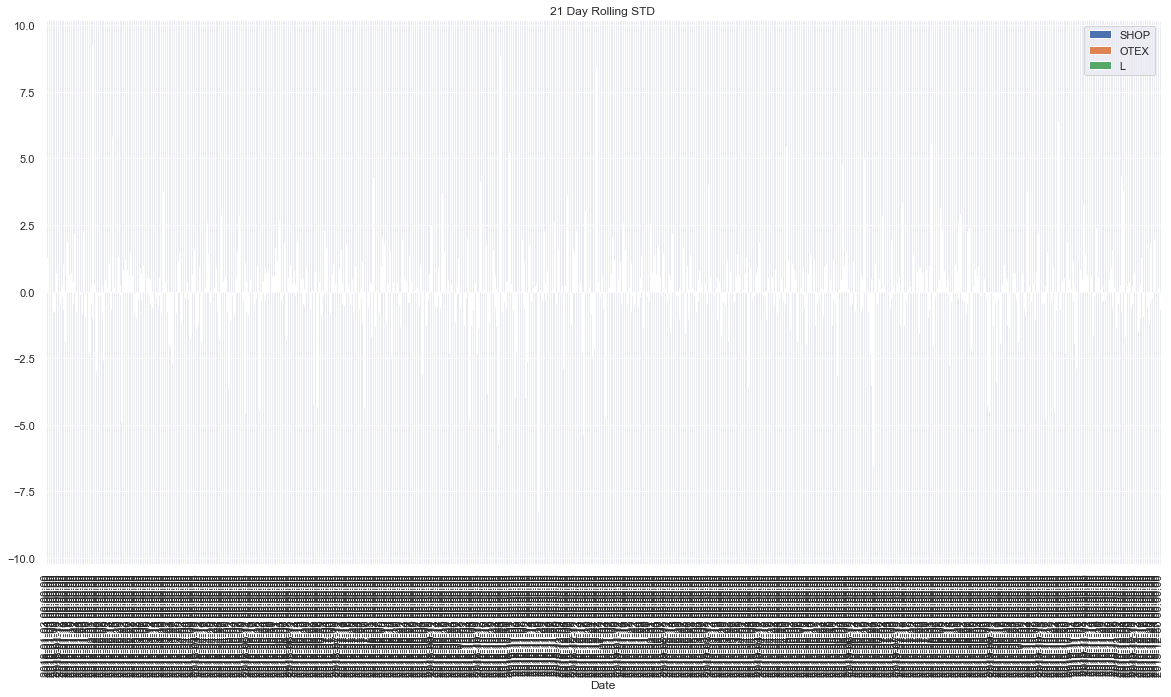

In [1359]:
# Calculate rolling standard deviation
twentyoneday_rolling_std= new_annualized_std * np.sqrt(21)
# Plot rolling standard deviation
twentyoneday_rolling_std= twentyoneday_rolling_std.plot(kind = "bar", title = "21 Day Rolling STD", figsize=(20,10))

### Calculate and plot the correlation

In [1354]:
# Calculate and plot the correlation
otex_correlation = pd.DataFrame(daily_returns.corr()).loc["OTEX"]
otex_correlation[otex_correlation==otex_correlation[otex_correlation<1].max()]
otex_correlation
                                                     

SHOP    0.398427
OTEX    1.000000
L       0.181266
Name: OTEX, dtype: float64

[Text(0.5, 1.0, 'correlation Matrix')]

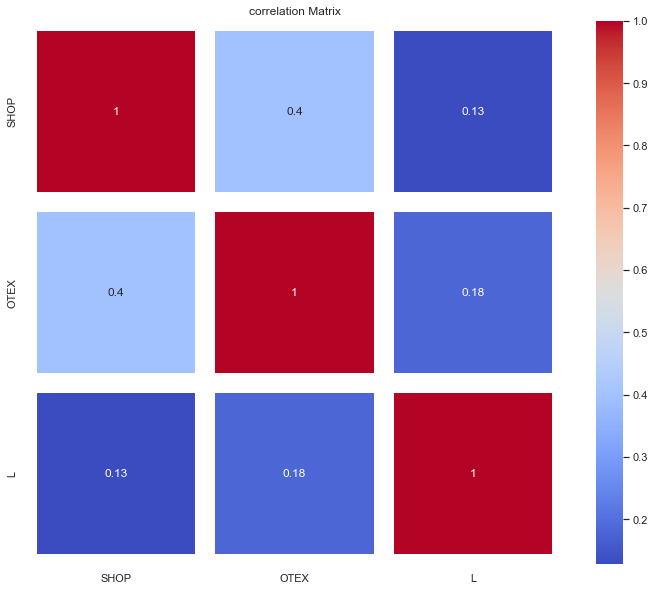

In [1360]:
otex_correlation = daily_returns.corr()
sns.set(rc={"figure.figsize" :(12,10)})
sns.heatmap(otex_correlation, cmap="coolwarm", linewidth=20, annot=True).set(title= "correlation Matrix")

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [1362]:
# Calculate Annualized Sharpe Ratios
sharpe_returns_one = (daily_returns.mean()*252)/(daily_returns.std()*np.sqrt(252))
sharpe_returns_one

SHOP    1.655513
OTEX    0.743512
L       0.570084
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio Plot 2'}>

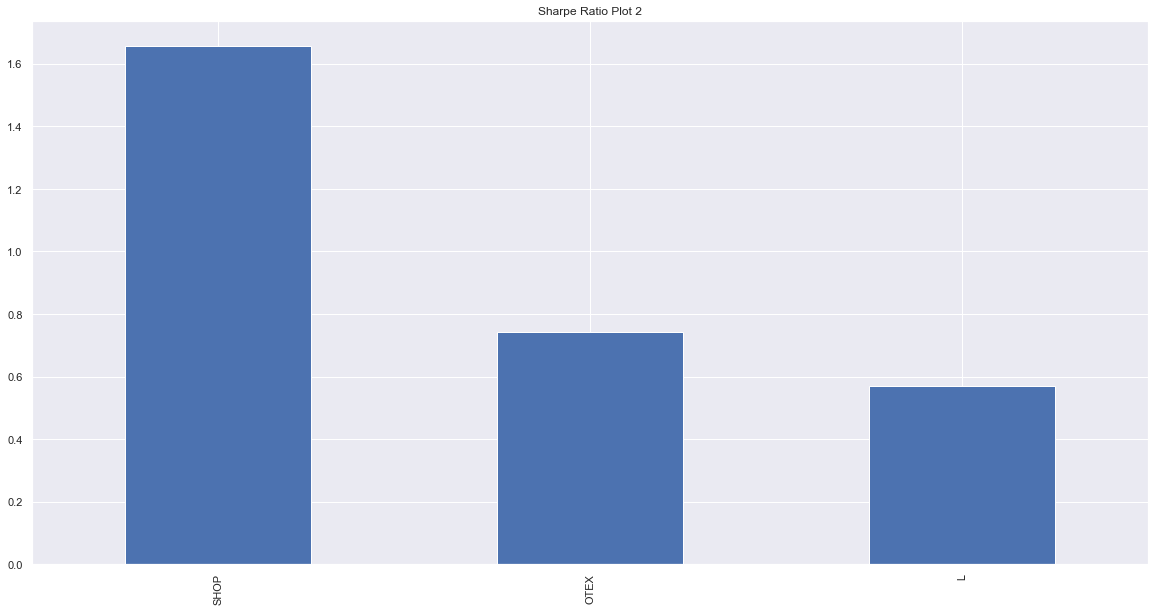

In [1363]:
# Visualize the sharpe ratios as a bar plot
sharpe_returns_one.plot(kind = "bar", title="Sharpe Ratio Plot 2", figsize=(20,10))

### How does your portfolio do?

Write your answer here!

In [ ]:
#My portfoio proves to be less risky and outperforms the others associated with the s&p 60 tsx.